In [ ]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

In [1]:
df <- read.csv(file="../input/gtd/globalterrorismdb_0718dist.csv", header=TRUE, sep=",")

In [2]:
summary(df)

    eventid              iyear          imonth            iday      
 Min.   :1.970e+11   Min.   :1970   Min.   : 0.000   Min.   : 0.00  
 1st Qu.:1.991e+11   1st Qu.:1991   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :2.009e+11   Median :2009   Median : 6.000   Median :15.00  
 Mean   :2.003e+11   Mean   :2003   Mean   : 6.467   Mean   :15.51  
 3rd Qu.:2.014e+11   3rd Qu.:2014   3rd Qu.: 9.000   3rd Qu.:23.00  
 Max.   :2.017e+11   Max.   :2017   Max.   :12.000   Max.   :31.00  
                                                                    
                 approxdate        extended            resolution    
                      :172452   Min.   :0.00000             :179471  
 September 18-24, 2016:   101   1st Qu.:0.00000   8/4/1998  :    18  
 2016-12-01 00:00:00  :    85   Median :0.00000   2/23/1988 :    11  
 2016-05-29 00:00:00  :    57   Mean   :0.04535   1/8/2010  :     8  
 2016-07-22 00:00:00  :    48   3rd Qu.:0.00000   10/14/2005:     8  
 2016-08-08 00:00:00  :    4

In [3]:
library(dplyr)
weaponcnt<-df%>%group_by(success,weaptype1_txt)%>%summarise(count=n())
weaponcnt


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




success,weaptype1_txt,count
<int>,<fct>,<int>
0,Biological,20
0,Chemical,78
0,Explosives,12680
0,Fake Weapons,15
0,Firearms,4434
0,Incendiary,663
0,Melee,369
0,Other,24
0,Radiological,12


In [4]:
weapprop <- mutate(weaponcnt, prop = count/sum(weaponcnt[which(weaponcnt$success==success,),"count"]))
#weapprop

In [5]:
dim(df[which(df$success==1,),])
dim(df[which(df$success==0,),])

[1] 161632    135

[1] 20059   135

**The below plot indicates that in all the cases of failure there are only few attacks with firearms hence low proportion similarly with explosive**

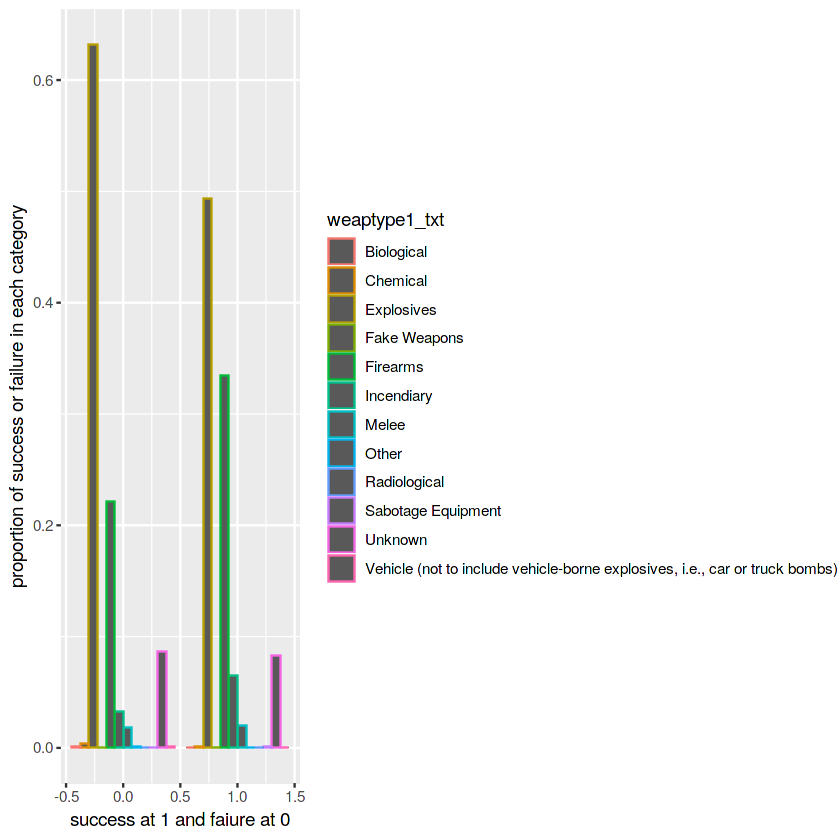

In [6]:
#weaponcnt
library(ggplot2)

ggplot(weapprop, aes(x=success, y=prop,group=weaptype1_txt,color=weaptype1_txt)) +
  geom_bar(stat = "identity",position = "dodge")+xlab("success at 1 and faiure at 0")+ylab("proportion of success or failure in each category")

In [ ]:
x=ggsave(file="bench_query_sort.pdf", width=4, height=4, dpi=300)
x

In [7]:
sui<-df%>%group_by(success,suicide)%>%summarise(count=n())
sui

success,suicide,count
<int>,<int>,<int>
0,0,18994
0,1,1065
1,0,156064
1,1,5568


In [8]:
sui1=mutate(sui, prop = count/sum(sui[which(sui$success==success,),"count"]))
sui2=sui1[which(sui1$suicide==1,),]
sui2

success,suicide,count,prop
<int>,<int>,<int>,<dbl>
0,1,1065,0.05309337
1,1,5568,0.03444862


In [ ]:
ggplot(sui2, aes(x=success, y=count)) +
  geom_bar(stat = "identity")+xlab("success =1 and failure=0 in all suicide attack-20% of suicide attacks have failed ")+ylab("count")